In [1]:
import itertools
import cv2
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl
import src.mymodel.gmm as mygmm
import torch
import time
from sklearn import mixture
import warnings
warnings.filterwarnings('ignore')
%load_ext autoreload
%autoreload 2




(2949, 2)


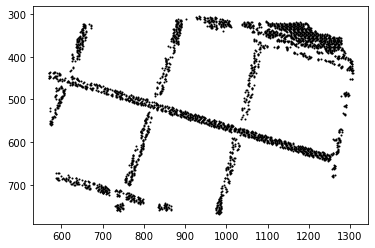

In [2]:
img = cv2.imread('data/point_cloud_to_image.png',cv2.IMREAD_GRAYSCALE)
bitmap = img < 100
H,W = bitmap.shape
# print(bitmap.shape)
U = np.array([range(W) for _ in range(H)])
V = np.array([range(H) for _ in range(W)]).T
u = U[bitmap]
v = V[bitmap]

X = np.c_[u,v].astype(np.float)
X = X[::10,:]

plt.scatter(X[:,0],X[:,1],s=1,color='k')
plt.gca().invert_yaxis()
print(X.shape)

In [3]:
%%timeit
numpy_gmm = mygmm.GMM(n_components=30, max_iter =30)
numpy_gmm.fit(X);
numpy_gmm.filter_GMM(X,filter_ratio=4);
numpy_gmm.merge_GMM(X);

1.1 s ± 424 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [4]:
%%timeit
X_tensor = torch.from_numpy(X).unsqueeze(0) # convert to tensor
torch_gmm = mygmm.GMM_torch(n_components=30, max_iter =30)
torch_gmm.fit(X_tensor);
torch_gmm.filter_GMM(X_tensor,filter_ratio=4);
torch_gmm.merge_GMM(X_tensor)

786 ms ± 382 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [9]:
%%timeit
X_tensor = torch.from_numpy(X).unsqueeze(0).cuda() # convert to tensor


124 µs ± 13.5 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [8]:
%%timeit
X_tensor = torch.from_numpy(X).unsqueeze(0).cuda() # convert to tensor
torch_gmm = mygmm.GMM_torch(n_components=30, max_iter =30)
torch_gmm.fit(X_tensor);
torch_gmm.filter_GMM(X_tensor,filter_ratio=4);
torch_gmm.merge_GMM(X_tensor)

249 ms ± 77.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
X_tensor = torch.from_numpy(X).unsqueeze(0) # convert to tensor
torch_gmm = mygmm.GMM_torch(n_components=30, max_iter =30)
torch_gmm.fit(X_tensor);
torch_gmm.filter_GMM(X_tensor,filter_ratio=4);
torch_gmm.merge_GMM(X_tensor)
torch_gmm.plot_results(X_tensor)
plt.xlim([X[:,0].min(),X[:,0].max()])
plt.ylim([X[:,1].min(),X[:,1].max()])

In [ ]:
numpy_gmm = mygmm.GMM(n_components=30, max_iter =30)
numpy_gmm.fit(X);
numpy_gmm.filter_GMM(X,filter_ratio=4);
numpy_gmm.merge_GMM(X);
numpy_gmm.plot_results(X)
plt.xlim([X[:,0].min(),X[:,0].max()])
plt.ylim([X[:,1].min(),X[:,1].max()])